# Exercício 3

Importando os pacotes do `tidyverse` necessários e a base de dados `imdb.rds`

In [1]:
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("dplyr"))

options(warn = -1)

imdb <- readr::read_rds("imdb.rds")

head(imdb)

titulo,ano,diretor,duracao,cor,generos,pais,classificacao,orcamento,receita,nota_imdb,likes_facebook,ator_1,ator_2,ator_3
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
Avatar,2009,James Cameron,178,Color,Action|Adventure|Fantasy|Sci-Fi,USA,A partir de 13 anos,237000000,760505847,7.9,33000,CCH Pounder,Joel David Moore,Wes Studi
Pirates of the Caribbean: At World's End,2007,Gore Verbinski,169,Color,Action|Adventure|Fantasy,USA,A partir de 13 anos,300000000,309404152,7.1,0,Johnny Depp,Orlando Bloom,Jack Davenport
The Dark Knight Rises,2012,Christopher Nolan,164,Color,Action|Thriller,USA,A partir de 13 anos,250000000,448130642,8.5,164000,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
John Carter,2012,Andrew Stanton,132,Color,Action|Adventure|Sci-Fi,USA,A partir de 13 anos,263700000,73058679,6.6,24000,Daryl Sabara,Samantha Morton,Polly Walker
Spider-Man 3,2007,Sam Raimi,156,Color,Action|Adventure|Romance,USA,A partir de 13 anos,258000000,336530303,6.2,0,J.K. Simmons,James Franco,Kirsten Dunst
Tangled,2010,Nathan Greno,100,Color,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,USA,Livre,260000000,200807262,7.8,29000,Brad Garrett,Donna Murphy,M.C. Gainey


## Gráficos

Dispersão da nota pela receita:

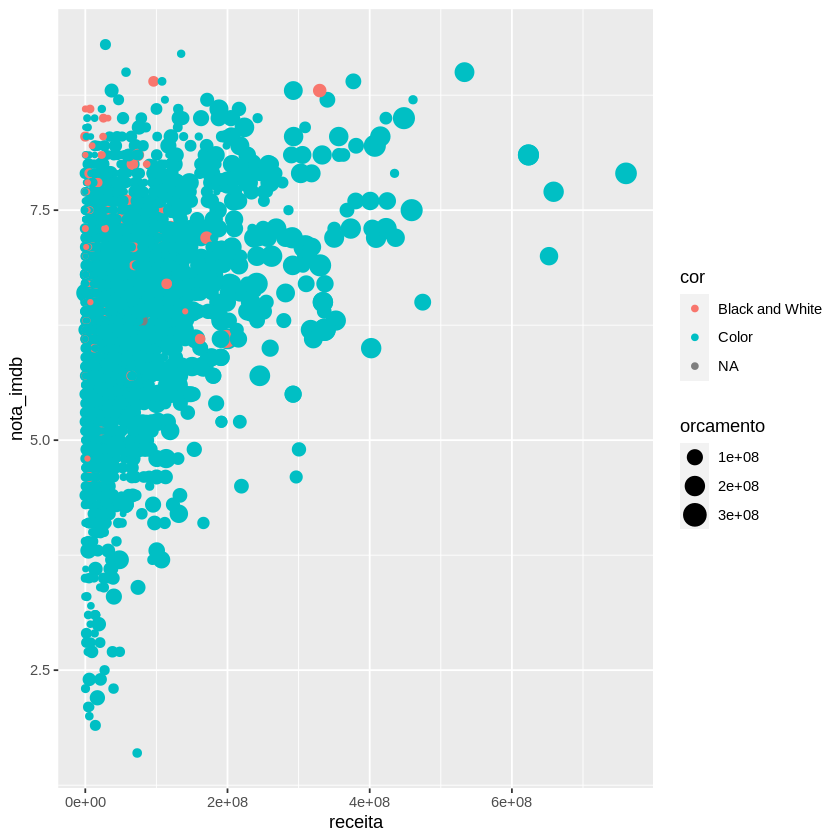

In [30]:
ggplot(imdb, aes(receita, nota_imdb, colour = cor, size = orcamento)) + geom_point()

Duração média dos filmes ao longo dos anos:

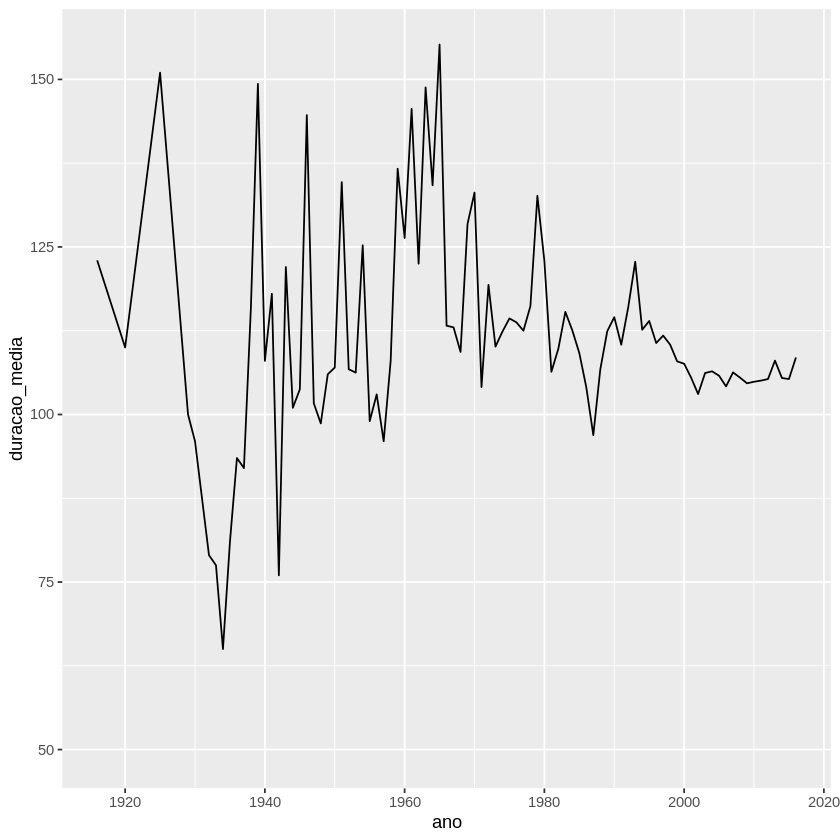

In [4]:
imdb %>% group_by(ano) %>% summarize(duracao_media = mean(duracao, na.rm = T)) %>% 
    ggplot(aes(ano, duracao_media)) + geom_line()

Orçamento e receita de acordo com a classificação indicativa: 

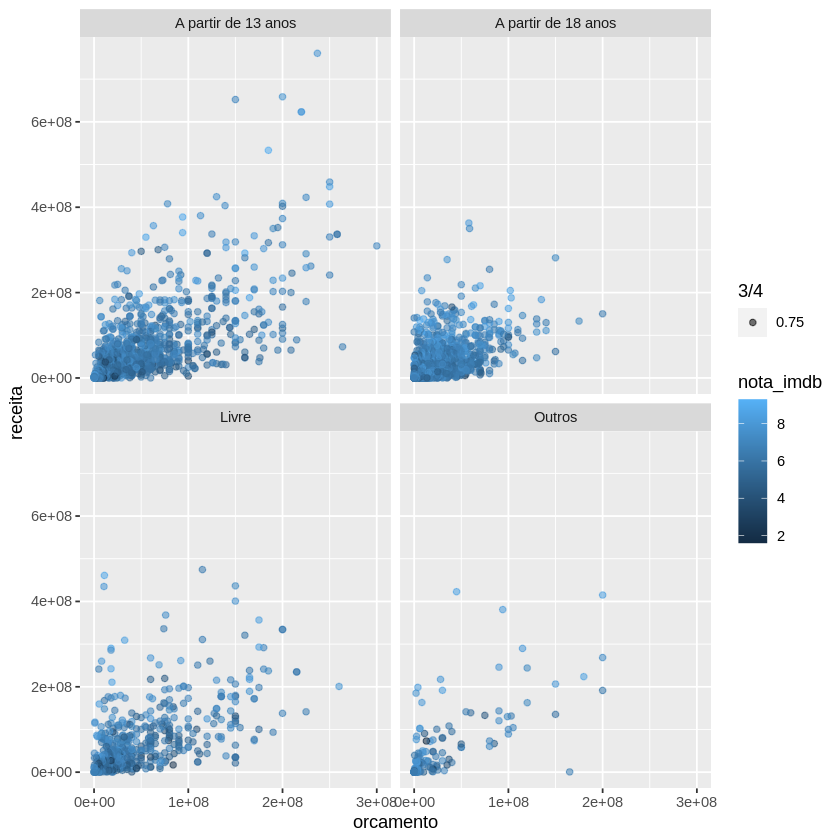

In [17]:
imdb %>% ggplot(aes(orcamento, receita, colour = nota_imdb, alpha = 3/4)) + geom_point() + 
    facet_wrap(~classificacao)

Histograma do orçamento dos filmes:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



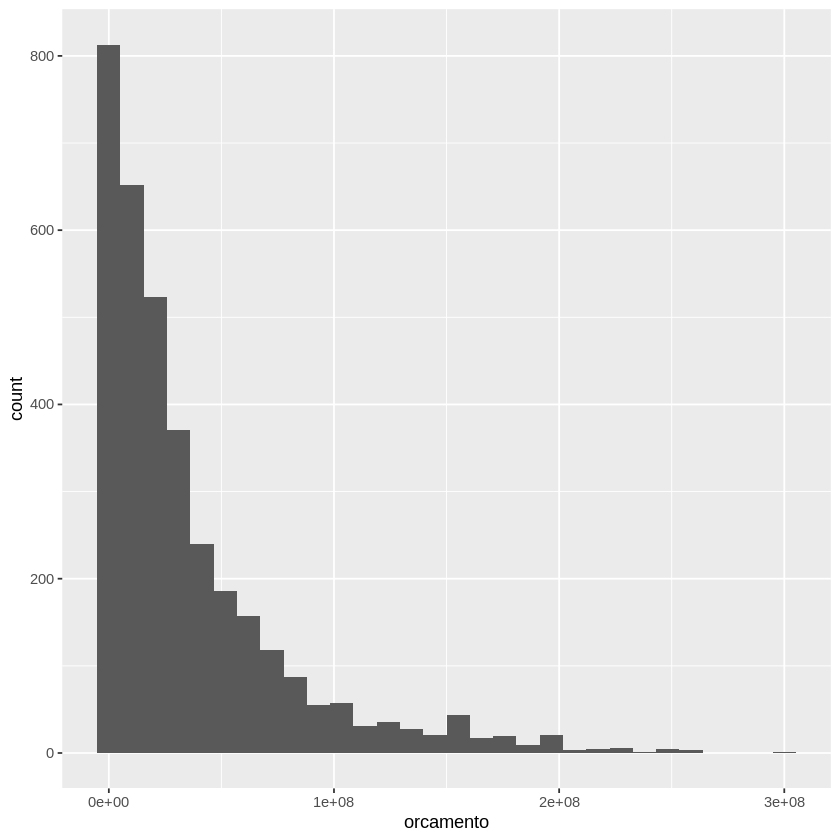

In [27]:
imdb %>% ggplot(aes(orcamento)) + geom_histogram()

Frequência de filmes com cor e em preto e branco:

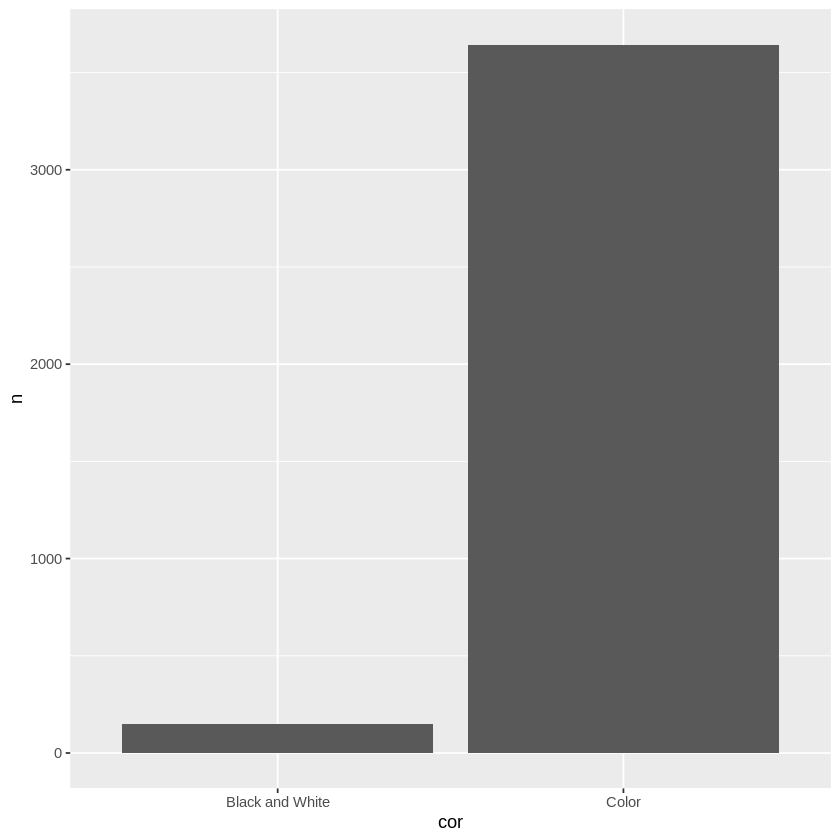

In [2]:
imdb %>% filter(!is.na(cor)) %>% count(cor) %>% ggplot(aes(cor, n)) + geom_col()

Quantidade de filmes +18 produzidos por diretor

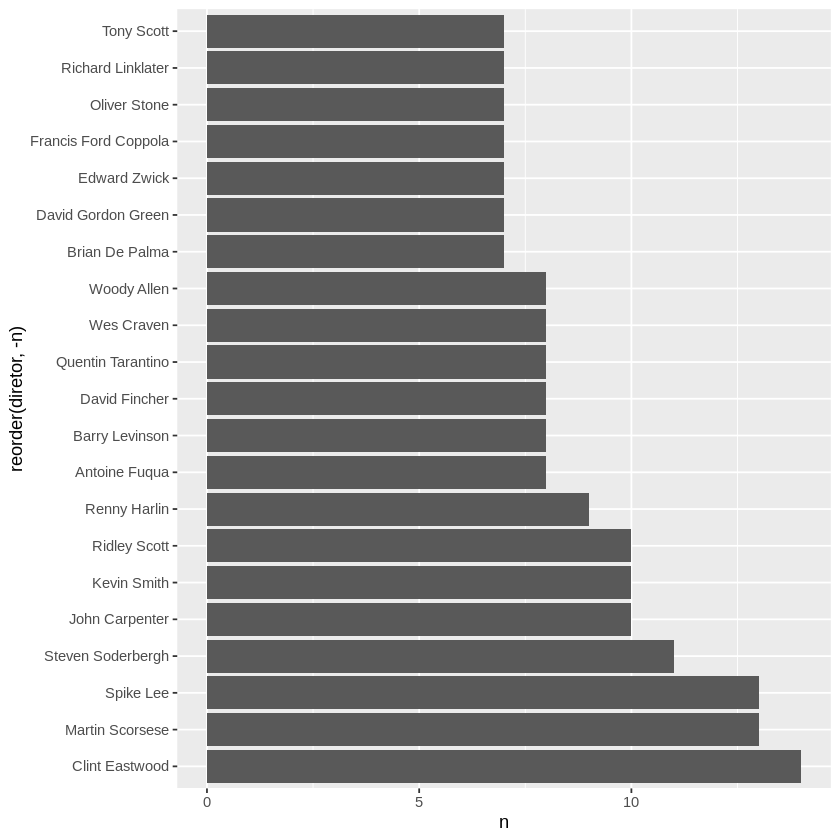

In [23]:
imdb %>% filter(!is.na(diretor) & classificacao == "A partir de 18 anos") %>% count(diretor) %>% 
    top_n(15, n) %>% ggplot(aes(y = reorder(diretor, -n), x = n)) + geom_col()